<a href="https://colab.research.google.com/github/shagunshukla09/medical-image-segmentation/blob/main/Copy_of_Equalization_Final_Lung_Cancer_densenet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.preprocessing import image

In [ ]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
%matplotlib inline
directory1='/content/drive/MyDrive/ColabNotebooks/Dataset/train/NORMAL/'
stk=os.listdir(directory1)
print(len(stk))

278


In [ ]:
for filename in os.listdir(directory1):
  f = os.path.join(directory1, filename)
  I = cv2.imread(f)
  gray = cv2.cvtColor(I, cv2.COLOR_BGR2GRAY)
  img_eq = cv2.equalizeHist(gray)
  cv2.imwrite("/content/drive/MyDrive/ColabNotebooks/Dataset/up_train/NORMAL/cropped_image_"+filename+".jpg", img_eq )

In [ ]:
train_datagen = image.ImageDataGenerator(
    rotation_range=15,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    width_shift_range=0.1,
    height_shift_range=0.1
)
test_datagen= image.ImageDataGenerator(
    rotation_range=15,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    width_shift_range=0.1,
    height_shift_range=0.1
    )

In [ ]:
train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/ColabNotebooks/Dataset/train',
    target_size = (224,224),
    batch_size = 8,
    class_mode = 'categorical')
validation_generator = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/ColabNotebooks/Dataset/test',
    target_size = (224,224),
    batch_size = 8,
    shuffle=True,
    class_mode = 'categorical')
test_generator = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/ColabNotebooks/Dataset/valid',
    target_size = (224,224),
    batch_size = 8,
    shuffle=True,
    class_mode = 'categorical')

Found 4181 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


#Histogram Equalization

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

figsize = (8, 8)

In [ ]:
I = cv2.imread("/content/drive/MyDrive/ColabNotebooks/Dataset/train/NORMAL/IM-0115-0001.jpeg", 0)
plt.figure(figsize=figsize)
plt.imshow(I, cmap="gray", vmin=0, vmax=255)
plt.title("Original image")
plt.show()

NameError: name 'cv2' is not defined

In [ ]:
#Original Image Histogram
hist,bins = np.histogram(I.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(I.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

NameError: name 'np' is not defined

In [ ]:
img_eq = cv2.equalizeHist(I)

In [ ]:
plt.figure(figsize=figsize)
plt.imshow(img_eq, cmap="gray", vmin=0, vmax=255)
plt.title("Equalized image")
plt.show()

NameError: name 'plt' is not defined

In [ ]:
hist,bins = np.histogram(img_eq.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img_eq.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

NameError: name 'np' is not defined

#Model Generation

In [ ]:
base_model = tf.keras.applications.DenseNet121(weights='imagenet', input_shape=(224,224,3), include_top=False)
for layer in base_model.layers:
    layer.trainable=True
model = Sequential()
model.add(base_model)
model.add(GaussianNoise(0.25))
model.add(GlobalAveragePooling2D())
model.add(Dense(1024,activation='relu'))
model.add(BatchNormalization())
model.add(GaussianNoise(0.25))
model.add(Dropout(0.25))
model.add(Dense(2, activation='sigmoid'))
model.summary()

29084464/29084464 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 7, 7, 1024)        7037504   
                                                                 
 gaussian_noise (GaussianNoi  (None, 7, 7, 1024)       0         
 se)                                                             
                                                                 
 global_average_pooling2d (G  (None, 1024)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 1024)              1049600   
                                                                 
 batch_normalization (BatchN  (None, 1024)             4096      
 ormalization)                                           

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001),
              metrics=['accuracy','AUC','Precision','Recall'])

#Model Running

In [ ]:
from keras.callbacks import EarlyStopping
es=EarlyStopping(monitor='val_loss',patience=3)
history = model.fit(
    train_generator,
    epochs=15,
    validation_data=validation_generator,
    steps_per_epoch= 105
    )

NameError: name 'model' is not defined

In [ ]:
model.evaluate(train_generator)

523/523 [==============================] - 87s 166ms/step - loss: 0.4290 - accuracy: 0.8431 - auc: 0.7930 - precision: 0.7217 - recall: 0.7381


[0.4289567768573761,
 0.8430997133255005,
 0.7929871082305908,
 0.721702516078949,
 0.7381009459495544]

In [ ]:
model.evaluate(test_generator)

2/2 [==============================] - 3s 3s/step - loss: 0.5439 - accuracy: 0.7500 - auc: 0.6875 - precision: 0.6316 - recall: 0.7500


[0.5439234972000122, 0.75, 0.6875, 0.6315789222717285, 0.75]

In [ ]:
model.evaluate(validation_generator)

78/78 [==============================] - 14s 172ms/step - loss: 0.5924 - accuracy: 0.7099 - auc: 0.6943 - precision: 0.6341 - recall: 0.6442


[0.5924122333526611,
 0.7099359035491943,
 0.694300651550293,
 0.6340693831443787,
 0.6442307829856873]

In [ ]:
from keras.preprocessing import image
img = tf.keras.utils.load_img('/content/drive/MyDrive/ColabNotebooks/Dataset/train/NORMAL/IM-0115-0001.jpeg')
imag = tf.keras.utils.img_to_array(img)
imaga = np.expand_dims(imag,axis=0)
ypred = model.predict(imaga)
print(ypred)
a=np.argmax(ypred,-1)
if a==0:
  op="Adenocarcinoma"
elif a==1:
  op="large cell carcinoma"
elif a==2:
  op="normal (void of cancer)"
else:
  op="squamous cell carcinoma"
plt.imshow(img)
print("THE UPLOADED IMAGE IS SUSPECTED AS: "+str(op))


ValueError: ignored

ValueError: ignored

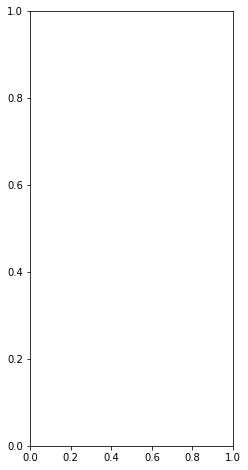

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(30)
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()